In [1]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Import data
df = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/listings.csv')

**Dataframe Information**

In [4]:
df.count()

id                                3734
name                              3734
host_id                           3734
host_name                         3734
neighbourhood                     3734
latitude                          3734
longitude                         3734
room_type                         3734
price                             3734
minimum_nights                    3734
number_of_reviews                 3734
reviews_per_month                 3365
calculated_host_listings_count    3734
availability_365                  3734
number_of_reviews_ltm             3734
review_scores_value               3362
review_scores_location            3362
review_scores_communication       3362
review_scores_checkin             3362
review_scores_cleanliness         3362
review_scores_accuracy            3362
review_scores_rating              3365
maximum_nights                    3734
beds                              3680
bedrooms                          3288
bathrooms                

In [61]:
# Check if there are any null values
df.isnull().sum(axis = 0)

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 369
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
review_scores_value               372
review_scores_location            372
review_scores_communication       372
review_scores_checkin             372
review_scores_cleanliness         372
review_scores_accuracy            372
review_scores_rating              369
maximum_nights                      0
beds                               54
bedrooms                          446
bathrooms                           9
accommodates

In [5]:
# Check if there are any null values
df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       1
4       0
       ..
3729    9
3730    8
3731    8
3732    8
3733    8
Length: 3734, dtype: int64

**Convert Dataframe to Geodataframe**

In [6]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')

### Correlation Matrix

In [7]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                             1.000000
bedrooms                          0.567294
accommodates                      0.561563
beds                              0.514923
calculated_host_listings_count    0.243406
id                                0.065775
maximum_nights                    0.057474
availability_365                  0.022898
review_scores_location            0.020752
review_scores_cleanliness         0.019260
latitude                          0.016137
review_scores_accuracy            0.001554
review_scores_rating              0.000882
host_id                          -0.000534
review_scores_communication      -0.003661
review_scores_checkin            -0.016518
minimum_nights                   -0.032539
review_scores_value              -0.038478
longitude                        -0.067791
reviews_per_month                -0.117777
number_of_reviews_ltm            -0.127049
number_of_reviews                -0.129120
Name: price, dtype: float64

In [8]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

In [9]:
null_index = gdf_utm[feature_list].isnull().sum(axis=1)

In [10]:
null_index == 0


0        True
1        True
2        True
3       False
4        True
        ...  
3729    False
3730    False
3731    False
3732    False
3733    False
Length: 3734, dtype: bool

### Get rid of Rows with Null/"NaN" values

In [11]:
gdf_utm_nonnull = gdf_utm.loc[null_index == 0, :]

In [12]:
gdf_utm_nonnull

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_checkin,review_scores_cleanliness,review_scores_accuracy,review_scores_rating,maximum_nights,beds,bedrooms,bathrooms,accommodates,geometry
0,12899,"Alberta Arts 2 bedroom suite, charming 1906 house",49682,Ali And David,Concordia,45.564880,-122.634180,Entire home/apt,89,3,...,4.99,4.98,4.94,4.93,730,2.0,2.0,1,3,POINT (528547.500 5045769.599)
1,37676,Mt. Hood View in the Pearl District,162158,Paul,Pearl,45.525640,-122.682730,Entire home/apt,140,30,...,4.83,4.86,4.86,4.88,730,1.0,1.0,1,3,POINT (524776.035 5041393.989)
2,41601,Grandpa's Bunkhouse-Backyard Studio,179045,Jean,Roseway,45.548040,-122.585410,Entire home/apt,129,3,...,4.95,4.90,4.90,4.84,29,1.0,1.0,1,2,POINT (532363.029 5043917.214)
4,61893,Perfect Portland Place,300391,Matt,Goose Hollow,45.522580,-122.699550,Entire home/apt,104,30,...,4.93,5.00,5.00,5.00,300,1.0,1.0,1,2,POINT (523463.811 5041048.978)
5,65466,Mt. Tabor Bungalow,170035,Scott,Mt. Tabor,45.505440,-122.610410,Private room,60,2,...,4.97,4.95,4.95,4.92,14,1.0,1.0,1,2,POINT (530434.485 5039174.682)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,53623129,"Modern, Upgraded Apartment - fast wifi and par...",409693567,Patrick,Pearl,45.529118,-122.680400,Entire home/apt,233,1,...,2.00,5.00,5.00,4.00,365,2.0,1.0,1,3,POINT (524956.481 5041781.064)
3690,53631855,Charming guest suite in Maywood Park,6921798,Meredith,Maywood Park,45.553293,-122.561127,Entire home/apt,64,1,...,5.00,5.00,5.00,5.00,365,1.0,1.0,1,4,POINT (534255.407 5044510.893)
3691,53644475,"Fantastic Forested Retreat, Open Layout, Multi...",62261998,ITrip Vacations,Southwest Hills,45.494583,-122.707945,Entire home/apt,137,3,...,5.00,5.00,5.00,5.00,29,1.0,1.0,1,2,POINT (522819.470 5037936.167)
3692,53649962,New Modern 3 BR Designer Home in Trendy N Will...,35305959,Byron (Hüga Homes),Humboldt,45.555253,-122.666736,Entire home/apt,203,2,...,5.00,5.00,5.00,5.00,1125,3.0,3.0,2.5,7,POINT (526011.408 5044688.981)


**Match Neighborhoods to Districts**

In [13]:
neigh_from = ['Arbor Lodge', 'Boise', 'Bridgeton', 'Cathedral Park', 'East Columbia', 'Eliot', 'Hayden Island', 'Humboldt', 'Kenton', 'Overlook', 'Piedmont', 'Portsmouth', 'St. Johns', 'University Park', 'Alameda', 'Alberta Arts District', 'Beaumont-Wilshire', 'North Tabor', 'Concordia', 'Cully', 'Grant Park', 'Hollywood', 'Irvington', 'King', 'Madison South', 'Rose City Park', 'Roseway', 'Sabin', "Sullivan's Gulch", 'Sumner', 'Sunderland', 'Vernon', 'Woodlawn', 'Arnold Creek', 'Ashcreek', 'Bridlemile', 'Collins View', 'Crestwood', 'Far Southwest', 'Hayhurst', 'Hillsdale', 'Homestead', 'Maplewood', 'Markham', 'Marshall Park', 'Multnomah', 'South Burlingame', 'Southwest Hills', 'West Portland Park', 'Argay', 'Centennial', 'Glenfair', 'Hazelwood', 'Lents', 'Mill Park', 'Parkrose', 'Parkrose Heights', 'Pleasant Valley', 'Powellhurst Gilbert', 'Russell', 'Wilkes', 'Arlington Heights', 'Forest Park', 'Goose Hollow ', 'Hillside', 'Linnton', 'Northwest Heights', 'Sylvan Highlands', 'Old Town/Chinatown', 'Portland Downtown', 'Lloyd District', 'Pearl', 'Brentwood–Darlington', 'Brooklyn Action Corps', 'Buckman', 'Creston–Kenilworth', 'Eastmoreland', 'Foster-Powell', 'Hawthorne', 'Hosford-Abernethy', 'Ardenwald-Johnson Creek', 'Kerns', 'Laurelhurst', 'Montavilla', 'Mt. Scott-Arleta', 'Mt. Tabor', 'Reed', 'Richmond', 'Sellwood-Moreland Improvement League', 'South Tabor', 'Sunnyside', 'Woodstock']
neigh_to = ['North', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'North','North','North','Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'Southwest', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'East', 'Northwest','Northwest','Northwest','Northwest','Northwest','Northwest','Northwest','Central','Central','Central','Central','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast','Southeast']
neigh_match_table = pd.DataFrame({'Neighborhood_D': neigh_from, 'Districts': neigh_to})

In [14]:
len(neigh_from)

92

In [15]:
len(neigh_to)

92

In [16]:
neigh_match_table

,Neighborhood_D,Districts
0,Arbor Lodge,North
1,Boise,North
2,Bridgeton,North
3,Cathedral Park,North
4,East Columbia,North
...,...,...
87,Richmond,Southeast
88,Sellwood-Moreland Improvement League,Southeast
89,South Tabor,Southeast
90,Sunnyside,Southeast


In [21]:
neigh_match_table.columns = neigh_match_table.columns.str.replace('Neighborhood_D', 'neighbourhood')
neigh_match_table

,neighbourhood,Districts
0,Arbor Lodge,North
1,Boise,North
2,Bridgeton,North
3,Cathedral Park,North
4,East Columbia,North
...,...,...
87,Richmond,Southeast
88,Sellwood-Moreland Improvement League,Southeast
89,South Tabor,Southeast
90,Sunnyside,Southeast


**Joining Tables together**

In [22]:
join_df = gdf_utm_nonnull.merge(neigh_match_table, how = 'left' , on = 'neighbourhood')
join_df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_cleanliness,review_scores_accuracy,review_scores_rating,maximum_nights,beds,bedrooms,bathrooms,accommodates,geometry,Districts
0,12899,"Alberta Arts 2 bedroom suite, charming 1906 house",49682,Ali And David,Concordia,45.564880,-122.634180,Entire home/apt,89,3,...,4.98,4.94,4.93,730,2.0,2.0,1,3,POINT (528547.500 5045769.599),Northeast
1,37676,Mt. Hood View in the Pearl District,162158,Paul,Pearl,45.525640,-122.682730,Entire home/apt,140,30,...,4.86,4.86,4.88,730,1.0,1.0,1,3,POINT (524776.035 5041393.989),Central
2,41601,Grandpa's Bunkhouse-Backyard Studio,179045,Jean,Roseway,45.548040,-122.585410,Entire home/apt,129,3,...,4.90,4.90,4.84,29,1.0,1.0,1,2,POINT (532363.029 5043917.214),Northeast
3,61893,Perfect Portland Place,300391,Matt,Goose Hollow,45.522580,-122.699550,Entire home/apt,104,30,...,5.00,5.00,5.00,300,1.0,1.0,1,2,POINT (523463.811 5041048.978),NaN
4,65466,Mt. Tabor Bungalow,170035,Scott,Mt. Tabor,45.505440,-122.610410,Private room,60,2,...,4.95,4.95,4.92,14,1.0,1.0,1,2,POINT (530434.485 5039174.682),Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,53623129,"Modern, Upgraded Apartment - fast wifi and par...",409693567,Patrick,Pearl,45.529118,-122.680400,Entire home/apt,233,1,...,5.00,5.00,4.00,365,2.0,1.0,1,3,POINT (524956.481 5041781.064),Central
2925,53631855,Charming guest suite in Maywood Park,6921798,Meredith,Maywood Park,45.553293,-122.561127,Entire home/apt,64,1,...,5.00,5.00,5.00,365,1.0,1.0,1,4,POINT (534255.407 5044510.893),NaN
2926,53644475,"Fantastic Forested Retreat, Open Layout, Multi...",62261998,ITrip Vacations,Southwest Hills,45.494583,-122.707945,Entire home/apt,137,3,...,5.00,5.00,5.00,29,1.0,1.0,1,2,POINT (522819.470 5037936.167),Southwest
2927,53649962,New Modern 3 BR Designer Home in Trendy N Will...,35305959,Byron (Hüga Homes),Humboldt,45.555253,-122.666736,Entire home/apt,203,2,...,5.00,5.00,5.00,1125,3.0,3.0,2.5,7,POINT (526011.408 5044688.981),North


In [23]:
# Check if there are any null values
join_df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       1
4       0
       ..
2924    0
2925    1
2926    0
2927    0
2928    1
Length: 2929, dtype: int64

**Excluding any null values**

In [28]:
join_df.isnull().sum(axis = 0)

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
review_scores_value                 0
review_scores_location              0
review_scores_communication         0
review_scores_checkin               0
review_scores_cleanliness           0
review_scores_accuracy              0
review_scores_rating                0
maximum_nights                      0
beds                                0
bedrooms                            0
bathrooms                           3
accommodates

In [29]:
# Define feature list
new_feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews', 'Districts']

In [34]:
null_join = join_df[new_feature_list].isnull().sum(axis=1)

In [35]:
null_join == 0

0        True
1        True
2        True
3       False
4        True
        ...  
2924     True
2925    False
2926     True
2927     True
2928    False
Length: 2929, dtype: bool

In [36]:
gdf_nonnull_match = join_df.loc[null_join == 0, :]

In [37]:
gdf_nonnull_match

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_cleanliness,review_scores_accuracy,review_scores_rating,maximum_nights,beds,bedrooms,bathrooms,accommodates,geometry,Districts
0,12899,"Alberta Arts 2 bedroom suite, charming 1906 house",49682,Ali And David,Concordia,45.564880,-122.634180,Entire home/apt,89,3,...,4.98,4.94,4.93,730,2.0,2.0,1,3,POINT (528547.500 5045769.599),Northeast
1,37676,Mt. Hood View in the Pearl District,162158,Paul,Pearl,45.525640,-122.682730,Entire home/apt,140,30,...,4.86,4.86,4.88,730,1.0,1.0,1,3,POINT (524776.035 5041393.989),Central
2,41601,Grandpa's Bunkhouse-Backyard Studio,179045,Jean,Roseway,45.548040,-122.585410,Entire home/apt,129,3,...,4.90,4.90,4.84,29,1.0,1.0,1,2,POINT (532363.029 5043917.214),Northeast
4,65466,Mt. Tabor Bungalow,170035,Scott,Mt. Tabor,45.505440,-122.610410,Private room,60,2,...,4.95,4.95,4.92,14,1.0,1.0,1,2,POINT (530434.485 5039174.682),Southeast
5,67036,Historic Home Located in Central City,329777,Will,Sullivan's Gulch,45.531030,-122.644480,Entire home/apt,425,4,...,5.00,5.00,4.93,365,5.0,4.0,2,12,POINT (527760.376 5042005.319),Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,53474842,The Garden Cottage on Broadway ~ 94 WalkScore ~,113868705,Darise,Irvington,45.536460,-122.647340,Entire home/apt,87,1,...,4.50,4.50,3.50,14,1.0,1.0,1,2,POINT (527534.406 5042607.595),Northeast
2923,53574604,Room available in se Portland,433867437,Shamal,Centennial,45.514220,-122.487852,Private room,39,1,...,3.33,4.33,4.00,5,1.0,1.0,1,2,POINT (540002.426 5040203.859),Southwest
2924,53623129,"Modern, Upgraded Apartment - fast wifi and par...",409693567,Patrick,Pearl,45.529118,-122.680400,Entire home/apt,233,1,...,5.00,5.00,4.00,365,2.0,1.0,1,3,POINT (524956.481 5041781.064),Central
2926,53644475,"Fantastic Forested Retreat, Open Layout, Multi...",62261998,ITrip Vacations,Southwest Hills,45.494583,-122.707945,Entire home/apt,137,3,...,5.00,5.00,5.00,29,1.0,1.0,1,2,POINT (522819.470 5037936.167),Southwest


**Write to csv**

In [58]:
table = pd.DataFrame(gdf_nonnull_match, columns= ['id', 'host_id', 'host_name', 'name', 'price', 'bedrooms', 'beds', 'room_type', 'accommodates', 
                  'maximum_nights','minimum_nights', 'availability_365', 'review_scores_location', 'calculated_host_listings_count','review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_rating', 'review_scores_communication', 'review_scores_checkin', 'review_scores_value', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews','longitude','latitude', 'geometry','neighbourhood','Districts'])

table.to_csv (r'C:\Users\clynn\Documents\Geog490-Top\D_listings.csv', index = False, header=True)

print (table)

            id    host_id           host_name  \
0        12899      49682       Ali And David   
1        37676     162158                Paul   
2        41601     179045                Jean   
4        65466     170035               Scott   
5        67036     329777                Will   
...        ...        ...                 ...   
2921  53474842  113868705              Darise   
2923  53574604  433867437              Shamal   
2924  53623129  409693567             Patrick   
2926  53644475   62261998     ITrip Vacations   
2927  53649962   35305959  Byron (Hüga Homes)   

                                                   name  price  bedrooms  \
0     Alberta Arts 2 bedroom suite, charming 1906 house     89       2.0   
1                   Mt. Hood View in the Pearl District    140       1.0   
2                   Grandpa's Bunkhouse-Backyard Studio    129       1.0   
4                                    Mt. Tabor Bungalow     60       1.0   
5                 Historic Home

**Bring in csv of District for regressor**

In [59]:
# Import data
df_central = pd.read_csv('C:/Users/clynn/Documents/Geog490-Top/neigh_central.csv')

In [60]:
# Convert DataFrame to GeoDataFrame
gdf_central = gpd.GeoDataFrame(df_central, geometry=gpd.points_from_xy(df_central['longitude'], df_central['latitude']))
gdf_central = gdf_central.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm_c = gdf_central.to_crs('EPSG:32610')

In [61]:
# Define feature list
feature_list =  ['bedrooms', 'accommodates', 
                 'beds', 'calculated_host_listings_count', 'id', 'maximum_nights', 'availability_365', 'review_scores_location', 'review_scores_cleanliness', 'latitude', 'review_scores_accuracy', 'review_scores_rating', 'host_id', 'review_scores_communication', 'review_scores_checkin', 'minimum_nights', 'review_scores_value', 'longitude', 'reviews_per_month', 'number_of_reviews_ltm', 'number_of_reviews']

**Forest Regressor**

In [62]:
# Define features and labels 
X = gdf_utm_c[feature_list]
y = gdf_utm_c['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [63]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [64]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

### Evaluate the Model

In [65]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

# output number is the number of errors
# the lower the number the better the model

35.13764029402229

### Plot

(0.0, 340.0)

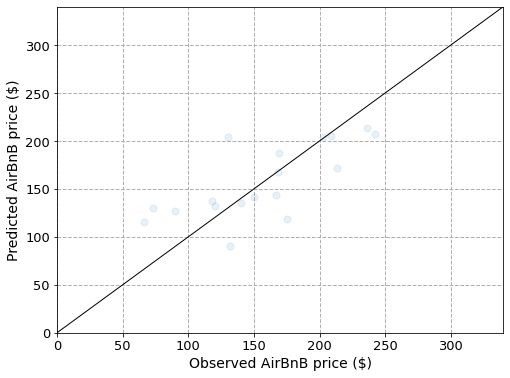

In [68]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,340], [0, 340], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted AirBnB price ($)', fontsize=14)
ax.set_xlabel('Observed AirBnB price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,340)
ax.set_xlim(0,340)

In [69]:
# Compute correlation matrix
corr_matrix = df_central.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                             1.000000
bedrooms                          0.392771
accommodates                      0.369610
calculated_host_listings_count    0.326944
beds                              0.326214
host_id                           0.247307
latitude                          0.243940
id                                0.227499
review_scores_cleanliness         0.064679
maximum_nights                    0.037571
review_scores_location           -0.009437
availability_365                 -0.039039
number_of_reviews_ltm            -0.051617
review_scores_accuracy           -0.075635
review_scores_communication      -0.087145
reviews_per_month                -0.090419
review_scores_value              -0.094305
review_scores_checkin            -0.137839
review_scores_rating             -0.143886
number_of_reviews                -0.165085
minimum_nights                   -0.233066
longitude                        -0.276235
Name: price, dtype: float64

In [72]:
# Rooms per house
gdf_utm_c['rooms_per_bedroom'] = gdf_utm_c['beds'] / gdf_utm['bedrooms']

In [75]:
# Compute correlation matrix
corr_matrix = gdf_utm_c.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                             1.000000
bedrooms                          0.392771
accommodates                      0.369610
rooms_per_bedroom                 0.348436
calculated_host_listings_count    0.326944
beds                              0.326214
host_id                           0.247307
latitude                          0.243940
id                                0.227499
review_scores_cleanliness         0.064679
maximum_nights                    0.037571
review_scores_location           -0.009437
availability_365                 -0.039039
number_of_reviews_ltm            -0.051617
review_scores_accuracy           -0.075635
review_scores_communication      -0.087145
reviews_per_month                -0.090419
review_scores_value              -0.094305
review_scores_checkin            -0.137839
review_scores_rating             -0.143886
number_of_reviews                -0.165085
minimum_nights                   -0.233066
longitude                        -0.276235
Name: price